<a href="https://colab.research.google.com/github/FredLongo/MLDL_Project/blob/main/Insomnia_ARIMA_Predictions_NK_4_23_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Team Insomnia - Stock Prediction

In [32]:
!pip install pmdarima

In [33]:
import pandas as pd
import numpy as np

from statsmodels.tsa.arima.model import ARIMA       #ARIMA model
import matplotlib.pyplot as plt                     # ploting Graphs
from statsmodels.graphics.tsaplots import plot_acf  # ploting more Graphs
from pmdarima.arima.utils import ndiffs             # for ndiffs evaluation
from statsmodels.graphics.tsaplots import plot_pacf # parcial graphs



In [34]:
import statsmodels.tsa

##Import Data from Files

In [35]:
#declare filenames
adm_file_path = '/content/drive/MyDrive/adm.us.txt'
#msi_file_path = 'msi.us.txt'
#xom_file_path = 'xom.us.txt'

#load files
adm_df = pd.read_csv(adm_file_path)
#msi_df = pd.read_csv(msi_file_path)
#xom_df = pd.read_csv(xom_file_path)


# Create index of date column
adm_df['Date'] = pd.to_datetime(adm_df['Date'])
adm_df.set_index('Date', inplace=True)

#msi_df['Date'] = pd.to_datetime(msi_df['Date'])
#msi_df.set_index('Date', inplace=True)

#xom_df['Date'] = pd.to_datetime(xom_df['Date'])
#xom_df.set_index('Date', inplace=True)


#Just the date and Closeing Column
adm_closing_prices = adm_df['Close'][0:len(adm_df['Close'])-10]
admTest = adm_df['Close'][len(adm_df['Close'])-10:len(adm_df['Close'])]
#msi_closing_prices = msi_df['Close']
#xom_closing_prices = xom_df['Close']

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Normilize the Data

Notes: Review video for process understanding  https://www.youtube.com/watch?v=gqryqIlvEoM

In [37]:
#Check to see if it needs to be made stationary

from statsmodels.tsa.stattools import adfuller
result = adfuller(adm_closing_prices.dropna())
print(f"ADF statistic : {result[0]}")
print(f"p-value: {result[1]}")



ADF statistic : -0.6588640082362208
p-value: 0.8571189745777148


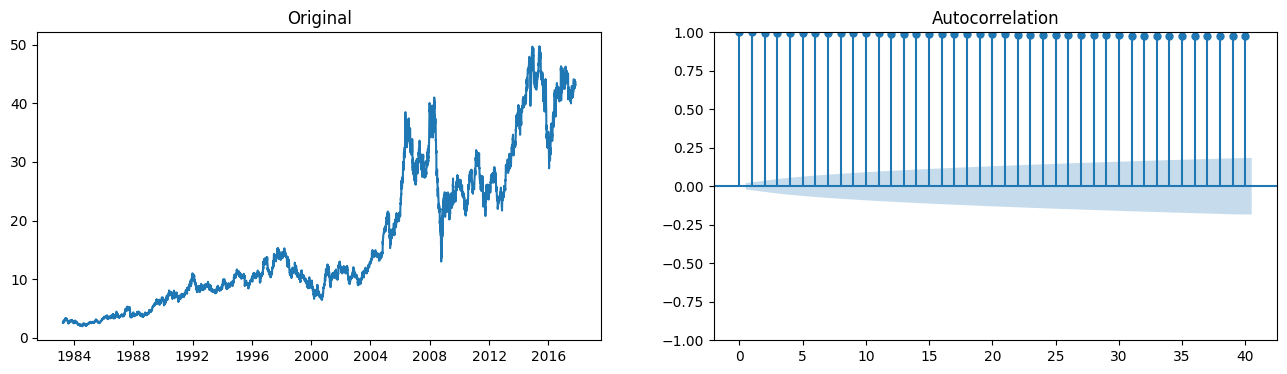

In [38]:
# Corrolation between serias and its lags
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,4))

ax1.plot(adm_closing_prices)
ax1.set_title("Original")
plot_acf(adm_closing_prices, ax=ax2);

In [39]:

# To standerdize the differential we need to know how many need to be taken.
#Used to see how many differentials should be taken
diff_num = ndiffs(adm_closing_prices, test="adf")
print(f"Number of Diffrening to run in :{diff_num}")


def x_diffs(df_: pd.DataFrame, x: int) -> pd.DataFrame:
    if x == 0:
        return df_
    else:
        return x_diffs(df_.diff().dropna(), x - 1)




Number of Diffrening to run in :1


(0.0, 1.0)

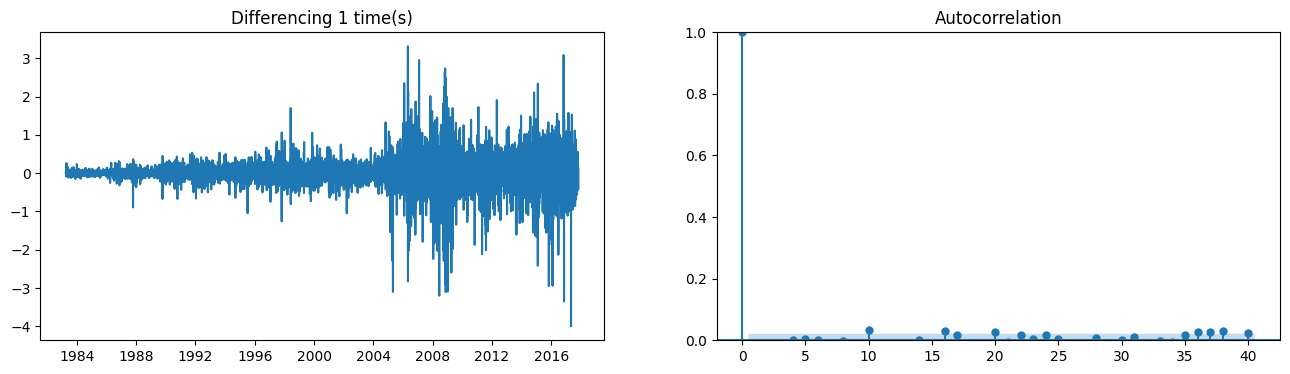

In [40]:
diff_x = x_diffs(adm_closing_prices,1)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,4))

ax1.plot(diff_x)
ax1.set_title(f"Differencing {diff_num} time(s)")
plot_acf(diff_x, ax=ax2);
ax2.set_ylim(0,1)

In [41]:
#Check to see if it needs to be made stationary

from statsmodels.tsa.stattools import adfuller
result = adfuller(diff_x.dropna())
print(f"ADF statistic : {result[0]}")
print(f"p-value: {result[1]}")

ADF statistic : -14.134265997472111
p-value: 2.3048153731563996e-26


In [42]:
from statsmodels.graphics.tsaplots import plot_pacf # parcial graphs


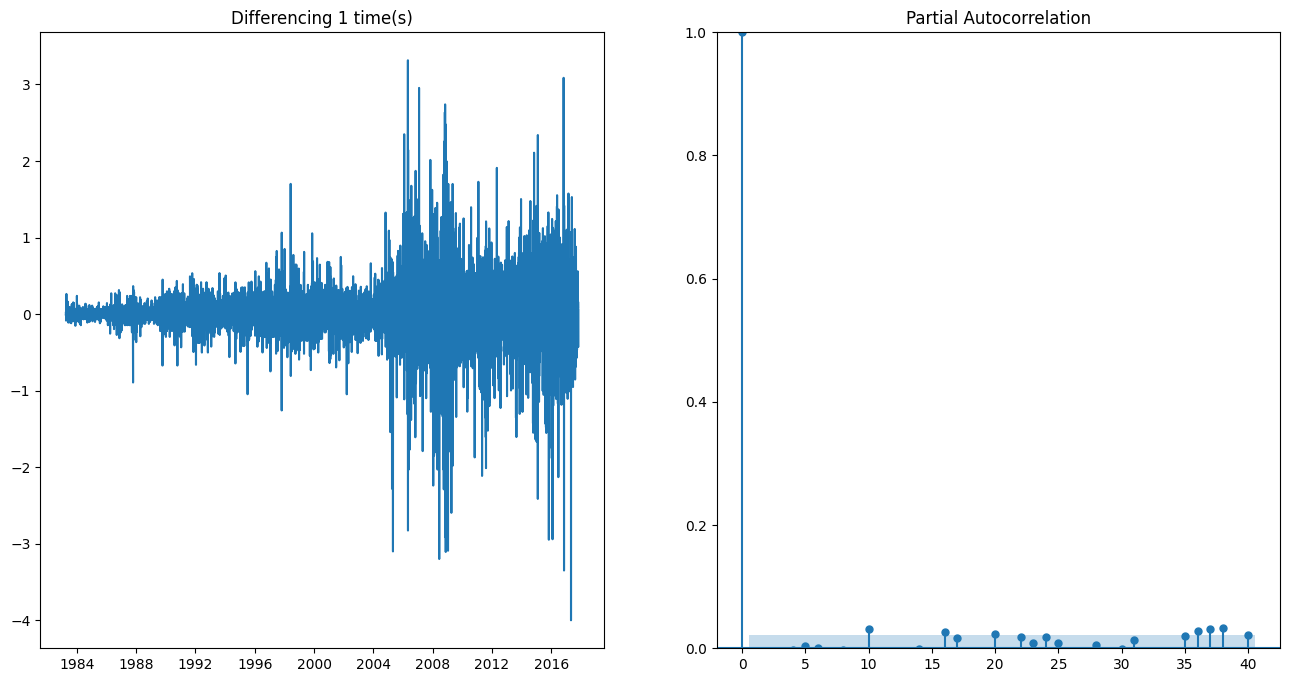

In [43]:
#partial Diffrencing
#import statsmodels
pdiff = adm_closing_prices.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))

ax1.plot(pdiff)
ax1.set_title(f"Differencing {diff_num} time(s)")

plot_pacf(pdiff, ax=ax2)
ax2.set_ylim(0, 1)  # Set the y-axis limits explicitly for ax2
plt.show()

#-------------------------------------------------------------------------------
#  Mapes are not comming out correctly.
#  They look like the ones from 'plot_acf()' but should be 'plot_pacf()'
#-------------------------------------------------------------------------------

In [44]:
#Check to see if it needs to be made stationary

from statsmodels.tsa.stattools import adfuller
result = adfuller(pdiff.dropna())
print(f"ADF statistic : {result[0]}")
print(f"p-value: {result[1]}")

ADF statistic : -14.134265997472111
p-value: 2.3048153731563996e-26


## Build Model

In [45]:
!pip install statsmodels

In [46]:
from statsmodels.tsa.arima.model import ARIMA

In [67]:
# Fit the ARIMA model
# The parameters for ARIMA are (p, d, q)
# p: periods taken for autoregressive model
      # lag observations

# d: Integrated order, difference
      #
# q: periods in moving average model
print(adm_df)
model = ARIMA(adm_df['Close'], order=(2, 1, 2),exog=adm_df[['Open','High',"Low", "Volume"]])  # Example parameters


               Open     High      Low    Close   Volume  OpenInt
Date                                                            
1983-04-06   2.6112   2.6200   2.5771   2.6200   539368        0
1983-04-07   2.6200   2.6539   2.6200   2.6368   443347        0
1983-04-08   2.6368   2.6878   2.5944   2.6200   926108        0
1983-04-11   2.6200   2.6368   2.6112   2.6200   304998        0
1983-04-12   2.6112   2.6200   2.5771   2.6112   159510        0
...             ...      ...      ...      ...      ...      ...
2017-11-06  39.7300  39.8400  39.0950  39.2700  2881709        0
2017-11-07  39.2700  39.5700  39.2200  39.5400  4562835        0
2017-11-08  39.6500  39.8100  39.5400  39.8000  3273446        0
2017-11-09  39.6900  40.1500  39.5100  39.6000  3933849        0
2017-11-10  39.4900  39.9600  39.4500  39.9300  2591397        0

[8726 rows x 6 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [68]:
result = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [69]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 8726
Model:                 ARIMA(2, 1, 2)   Log Likelihood                3230.396
Date:                Tue, 23 Apr 2024   AIC                          -6442.792
Time:                        14:38:22   BIC                          -6379.126
Sample:                             0   HQIC                         -6421.095
                               - 8726                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.6284      0.005   -127.628      0.000      -0.638      -0.619
High           0.7263      0.005    152.638      0.000       0.717       0.736
Low            0.7115      0.004    166.413      0.0

(array([1.10024430e-03, 3.30073291e-03, 1.43031759e-02, 7.99510860e-02,
        1.17469417e+00, 1.81797034e+00, 9.09535290e-02, 1.43031759e-02,
        2.93398481e-03, 7.33496202e-04]),
 array([-1.57808134, -1.26560516, -0.95312898, -0.6406528 , -0.32817661,
        -0.01570043,  0.29677575,  0.60925193,  0.92172811,  1.23420429,
         1.54668047]),
 <BarContainer object of 10 artists>)

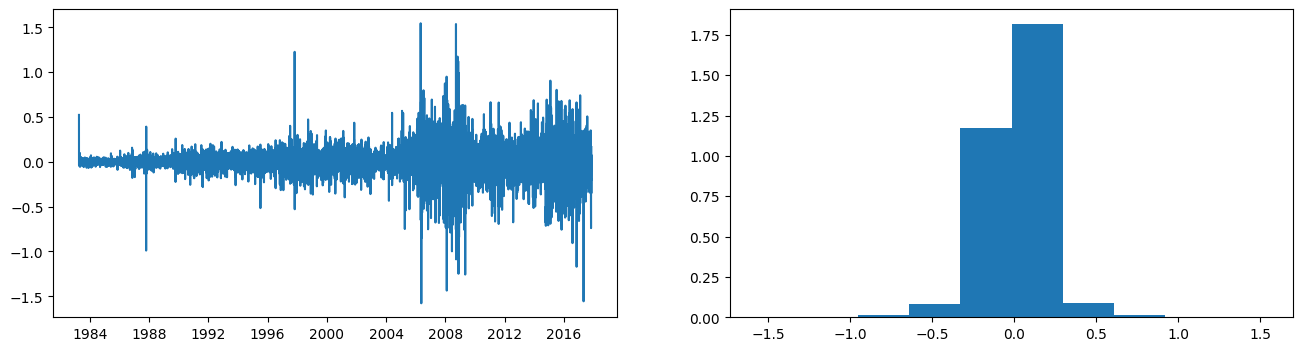

In [70]:
# plot  residual errors
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 4))

ax1.plot(residuals)
ax2.hist(residuals, density=1)




In [71]:
# Actual vs Fitted
#result.plot_predict(start = 1, end=60, dynamic=False,)
print(result.forecast(10,exog=adm_df[['Open', 'High', 'Low', "Volume"]].iloc[-10:].values))
print(admTest)


8726    42.155083
8727    40.579222
8728    40.178589
8729    40.383886
8730    39.729728
8731    39.331600
8732    39.514630
8733    39.676976
8734    39.877864
8735    39.822047
Name: predicted_mean, dtype: float64
Date
2017-10-30    42.81
2017-10-31    40.87
2017-11-01    40.62
2017-11-02    40.16
2017-11-03    39.78
2017-11-06    39.27
2017-11-07    39.54
2017-11-08    39.80
2017-11-09    39.60
2017-11-10    39.93
Name: Close, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [59]:
from pmdarima import auto_arima

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=61205.092, Time=8.75 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-9261.885, Time=7.36 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-9261.462, Time=9.86 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-9261.651, Time=11.34 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-9260.922, Time=9.61 sec


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-9244.165, Time=13.75 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-9261.189, Time=7.71 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 68.470 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 8726
Model:               SARIMAX(1, 0, 0)   Log Likelihood                4636.942
Date:                Tue, 23 Apr 2024   AIC                          -9261.885
Time:                        14:34:26   BIC                          -9219.441
Sample:                             0   HQIC                         -9247.420
                               - 8726                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

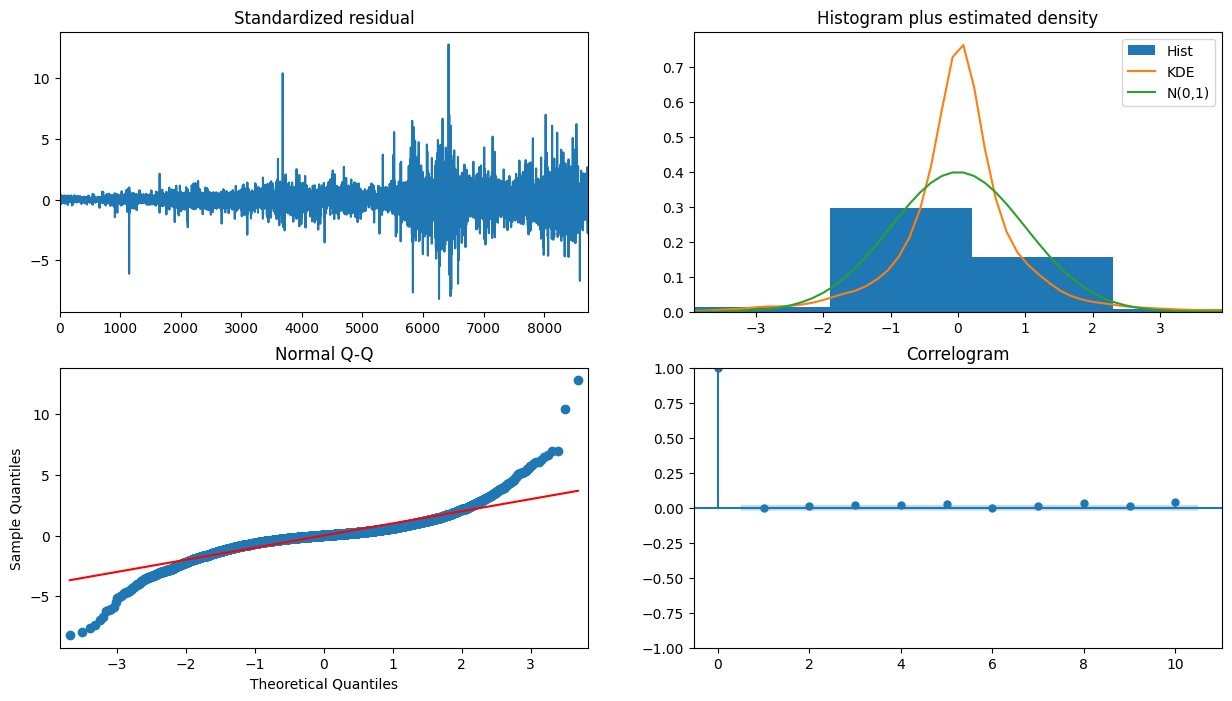

In [61]:
model_autoARIMA = auto_arima(y=adm_df['Close'], X=adm_df[['Open', 'High', 'Low', 'Volume']], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()